# skfuzzy library example
# Fuzzy sytem to tipping problem


In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

quality.automf(3)
service.automf(3)

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

## Antecedent: quality

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


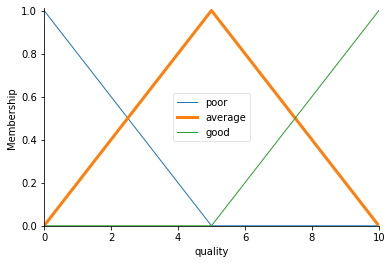

In [11]:
quality['average'].view()

## Antecedent: service

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


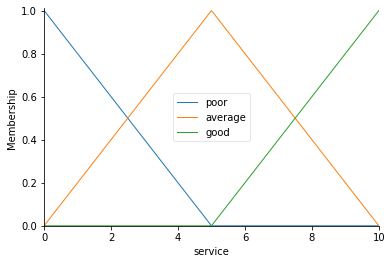

In [12]:
service.view()

## Consequent: tip percentage

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


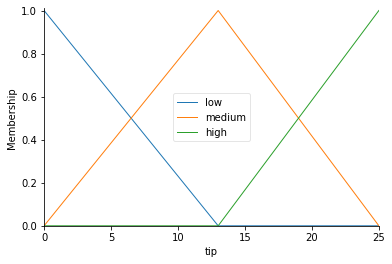

In [13]:
tip.view()

In [14]:
rule1 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['poor'] & quality['poor'], tip['low'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['quality'] = 2
tipping.input['service'] = 8

tipping.compute()

## Simulation to quality = 2 and service = 8

In [15]:
print('z = ',tipping.output['tip'])

z =  14.721311475409836


### x: quality

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


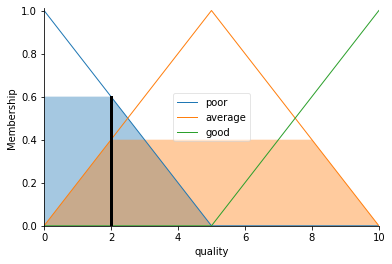

In [16]:
quality.view(sim=tipping)

### x: service

/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


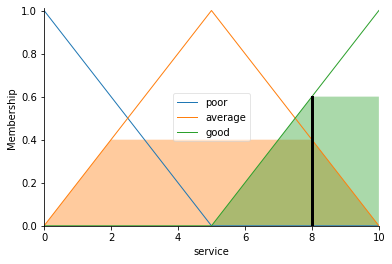

In [17]:
service.view(sim=tipping)

### y

membership_value -  low : 0.000
membership_value -  medium : 0.400
membership_value -  high : 0.600


/home/helder/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


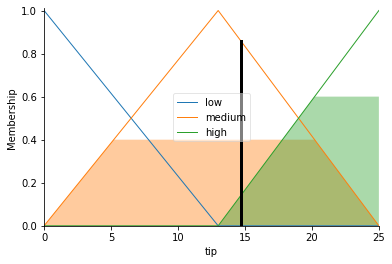

In [19]:
tip.view(sim=tipping)

def print_membership(class_name, simulation, classe):
    membership = classe.terms[class_name].membership_value.__getitem__(simulation)
    print('membership_value - ', class_name,': {:.3f}'.format(membership))

print_membership('low', tipping, tip)
print_membership('medium', tipping, tip)
print_membership('high', tipping, tip)